# Drinking age with a scikit-learn model

Run the 'drinking example' from the RDD chapter of [Causal Inference for the Brave and True](https://matheusfacure.github.io/python-causality-handbook/16-Regression-Discontinuity-Design.html).

Use sci-kit learn models

In [1]:
import pandas as pd
import pathlib
import arviz as az

In [2]:
az.style.use("arviz-darkgrid")

## Load data

In [3]:
rd_data_path = pathlib.Path.cwd().parents[1] / "causalpy" / "data" / "drinking.csv"
df = (
    pd.read_csv(rd_data_path)[["agecell", "all", "mva", "suicide"]]
    .rename(columns={"agecell": "age"})
    .assign(treated=lambda df_: df_.age > 21)
    .dropna(axis=0)
)

## Linear model

In [4]:
from causalpy.skl_experiments import RegressionDiscontinuity
from sklearn.linear_model import LinearRegression

result = RegressionDiscontinuity(
    df,
    formula="all ~ 1 + age + treated + age:treated",
    running_variable_name="age",
    outcome_variable_name="all",
    prediction_model=LinearRegression(),
    treatment_threshold=21,
)

## Examine results

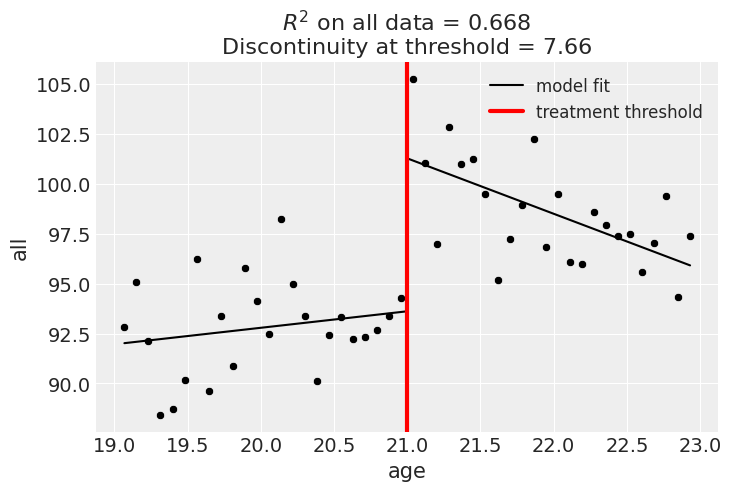

In [5]:
result.plot();

In [6]:
result.summary()

Difference in Differences experiment
Formula: all ~ 1 + age + treated + age:treated
Running variable: age
Threshold on running variable: 21

Results:
Discontinuity at threshold = 7.66
Model coefficients:
	Intercept		0.0
	treated[T.True]		83.33327394475465
	age		0.8269945102788174
	age:treated[T.True]		-3.6033601101397013
